
# **Introduction**

### **Team Members:**
* **Aloysius Law** (alaw002@e.ntu.edu.sg)
* **Emily Zhang** (hzhang084@e.ntu.edu.sg)
* **Krishika Chawla** (krishika0001@e.ntu.edu.sg)
* **Javier Lim** (javi0015@e.ntu.edu.sg)
* **Tiya Bansal** (tiya0001@e.ntu.edu.sg)

## Contents ##

1. Project Requirements
2. Problem Analysis 
3. Approach 
    - Thought Process 
    - Sub-problems
4. Code 
    - Normal Requirement 
    - Additional Requirement
5. Output 
    - Normal Requirement
    - Additional Requirement 
6. Challenges 
7. Conclusion 
8. Appendix 


# 🌟 ***Project Requirements***


### 🎯 Objective:
We need to form **teams of 5** for each of the **120 tutorial groups**, with **50 students** per group, in the Year 1 *Introduction to Data Science* course.

### ⚖️ Requirements:
The application must ensure **diversity** and **fairness** by considering the following factors for each team:
  
- 📚 **School Affiliation**
- 🧑‍🤝‍🧑 **Gender Balance**
- 🎓 **GPA Distribution**

## 🧐 ***Problem Analysis:***

After analyzing the data, we found the following insights:

### 1. **School Affiliation:**
- **18 schools** in total, with some schools having as many as **700+ students** (e.g., **EEE: 788** and **CoB (NBS): 793**).
- Some schools have as few as **1 student** (e.g., **HASS: 1**).

### 2. **Gender:**
- There a total of 2759 males to 3241 females in an approximate **2:3 ratio**.
- However, individual tutorial groups have different ratios, some have:
  - more males than females
  - male:female -> 4:1
  - female:male --> 1:4

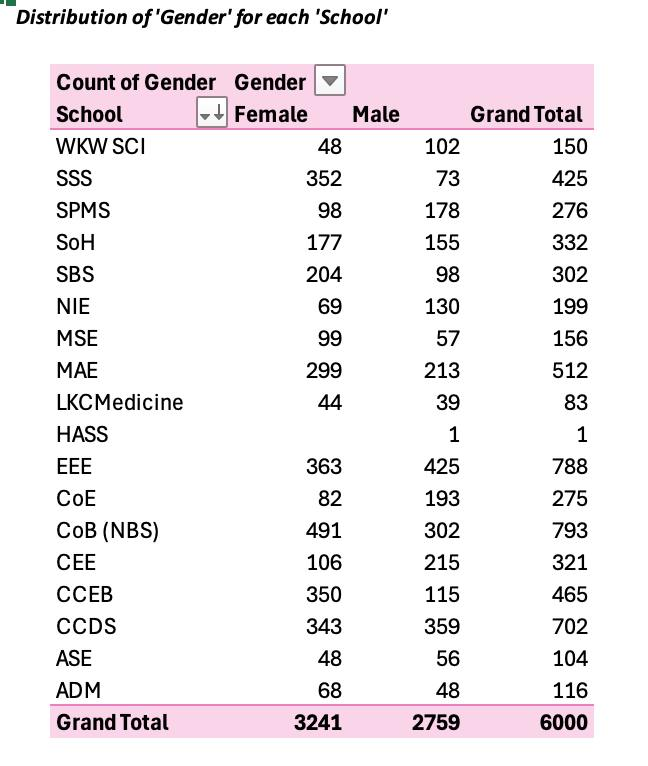

### 3. **CGPA:**
- **CGPA** follows a **normal distribution**, with most students' GPAs being close to the mean of **4.09**.
- The highest CGPA is **4.98**, while the lowest is **3.7**.
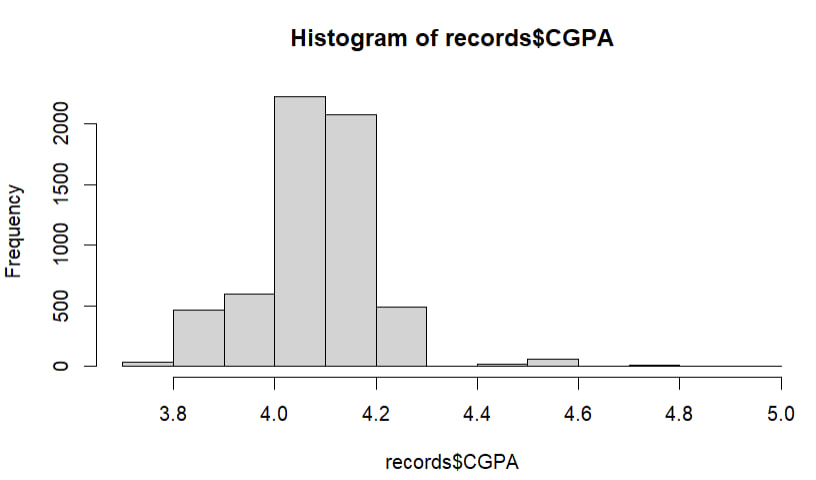



<br>

<br>

---

<br>

# ***Algorithm Design***

## **⚖️ Thought Process**


- ### **School Affiliation:**
  -  We rank this critieria as most important because every school focuses on different courses, which equips students with very different skillsets. For example, an **engineering student** and a **humanities student** learn very different things
  - Therefore, most important to have teams with **diverse skillsets** so they can **complement** one another's skillsets and see things differently, helping to contribute in a variety of aspects.

- ### **Gender Ratio for the Team:**
  -  Men and women have different working styles and diverse perspectives, and according to research, gender-balanced teams are able to produced work that was significantly more novel and more impactful on average.

  *Source: [Gender-balanced teams produce more innovative, impactful scientific research](https://news.northwestern.edu/stories/2022/08/gender-balanced-teams-produce-more-innovative-impactful-scientific-research/)*


- ### **Average CGPA across Teams:**
  - Different CGPA indicates different levels of academic aptitude, but academic excellence is not the only way to measure one's capability, as seen by the general shift towards taking up a more holistic method of assessment in Singapore's education.
  - Since CGPA is relatively normally distributed, with most students having scores close to the average, academic abilities are fairly comparable across the group. Therefore, we considered CGPA to be of lowest importance






# **Problem Decomposition**

##### We decided to sort students in a more systematic manner, with the following sub-problems:

### 1. **Split by Gender:**
- This is the easiest to do as there are only **two genders**.


### 2. **Sort through each gender list in order of highest to lowest CGPAs:**
- This creates an **organised list** from which we can pick students efficiently.
  

### 3. **Select 1 high CGPA boy with 1 low CGPA girl (ensuring no more than 2 students from the same school), then vice versa:**
-  This approach ensures that:
  - Students are picked **diverse** in all three criteria: **Gender**, **School**, and **GPA**.
  - The prioritization aligns with our **criteria ranking**, ensuring a balanced team.


### 4. **Continue selecting students based on gender ratio to maintain balance:**
- Select students from the respective lists while ensuring:
  - No more than **two students** from the same school.
  - A **balanced GPA** distribution across the team.
  

### 5. **Correct teams if they don't meet the diversity criteria:**
- If any team does not fulfill the diversity cutoff, we will:
  - **Swap students** within the tutorial group to ensure the teams are as diverse as possible.


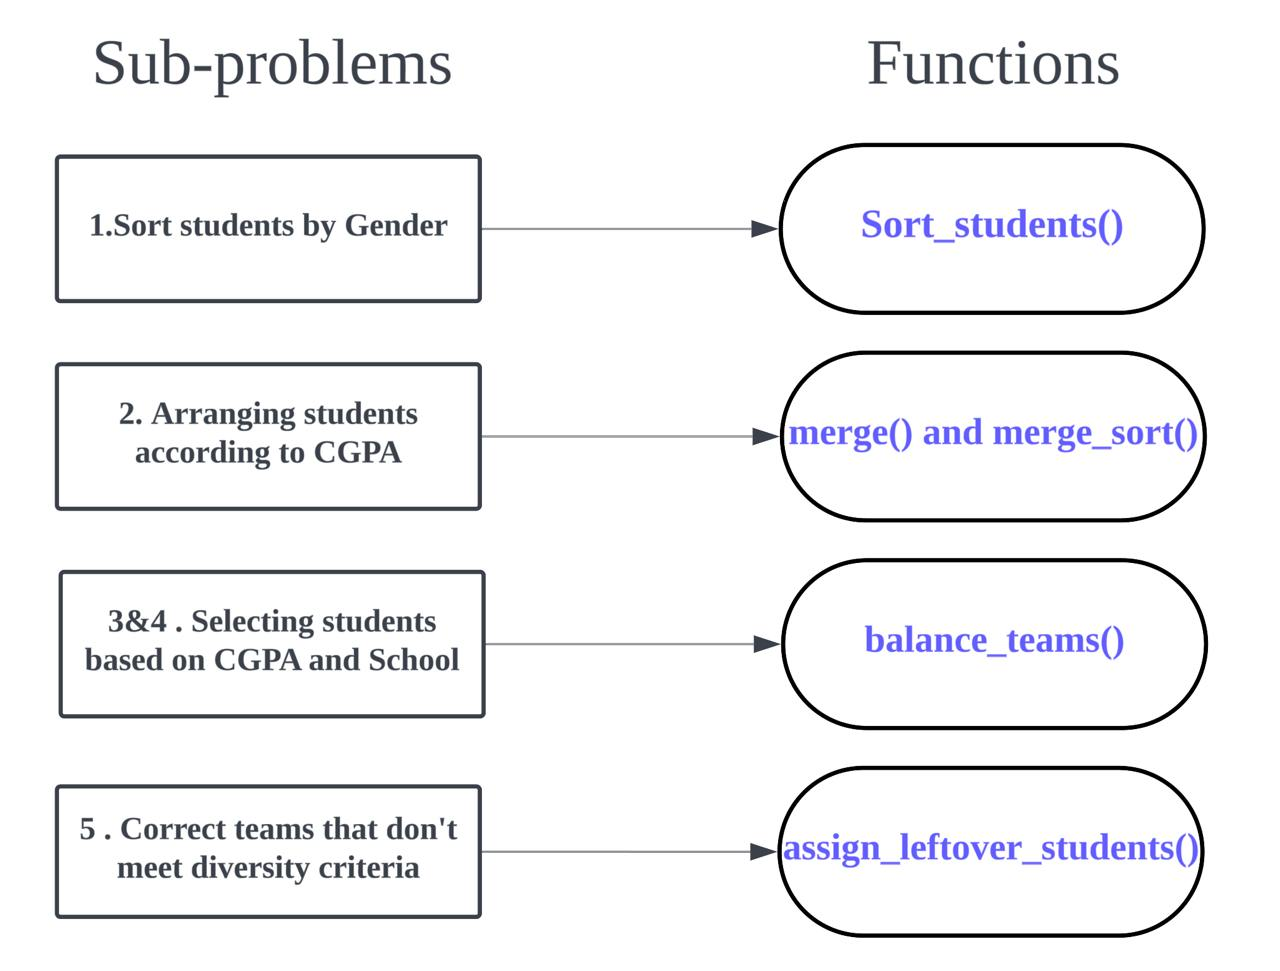

# 👨‍💻 The Functions 👩‍💻



## 1. `main()`

This is the main function that coordinates the entire process. The csv file is read using `read_csv`. The students are then grouped by their tutorial groups using `group_by_tutorial_group`. For each tutorial group, it sorts students by gender using `sort_students` and forms balanced teams using `balance_teams`. The teams from all tutorial groups are combined into `all_team_data`. The `export_teams_to_csv` function is called to save the new organised teams to a new csv file.

![Screenshot 2024-11-13 at 4.51.52 PM.png](<attachment:Screenshot 2024-11-13 at 4.51.52 PM.png>)
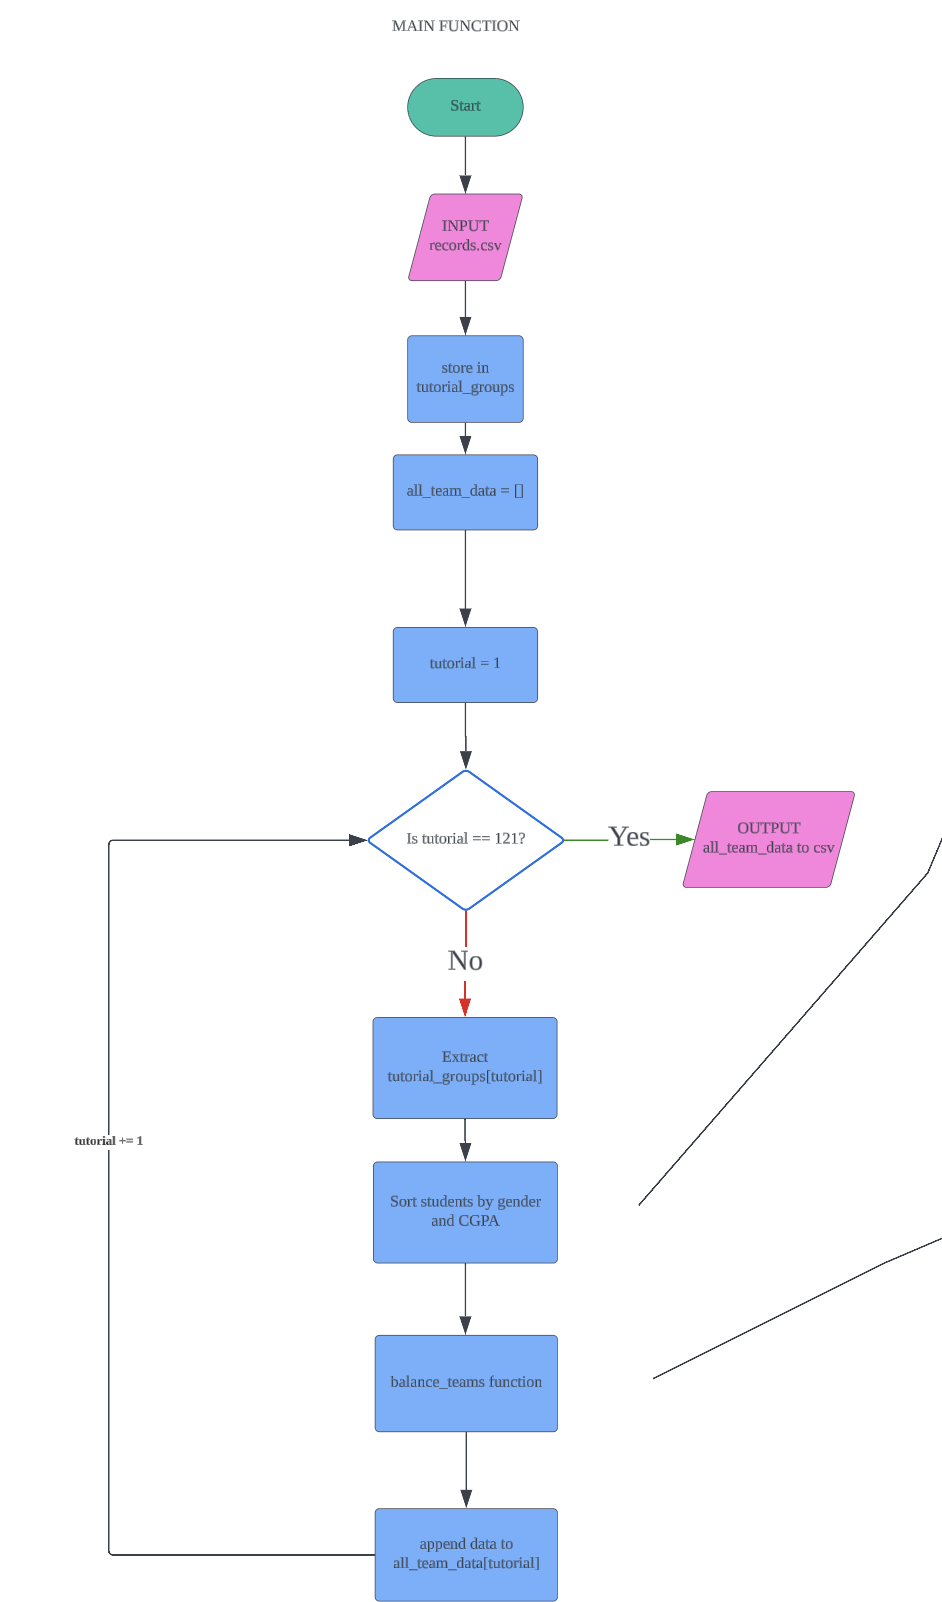

In [ ]:
def main():
    file_path = "C:/Users/tia/Downloads/records.csv"
    students_data = read_csv(file_path)
    tutorial_groups = group_by_tutorial_group(students_data)
    all_team_data = {}
    for tutorial, students in tutorial_groups.items():
        males, females = sort_students(students)
        teams = balance_teams(males, females)
        all_team_data[tutorial] = teams

    csv_file_name = 'no.csv'
    export_teams_to_csv(all_team_data, csv_file_name)
    print('Exported successfully as no.csv')
if __name__ == "__main__":
    main()

## 2. `read_csv(file_path)`

##### This function reads `records.csv`, containing students' details and organises it into a list of dictionaries. Using the `with open()` statement, the file is opened in read mode to ensure it is properly closed after processing. The first line, containing the headers, is read and used to map the subsequent data rows. The function then iterates through every line after the headers to get details of each student. It creates a dictionary for each student with keys and then appends each student dictionary to the list `students[]`. The resulting list contains all student records.

In [ ]:
def read_csv(file_path):
    with open(file_path, 'r') as file:
        headers = file.readline().strip().split(',')
        for line in file:
            values = line.strip().split(',')
            student = {
                'Tutorial Group': values[0],
                'Student ID': values[1],
                'School': values[2],
                'Name': values[3],
                'Gender': values[4],
                'CGPA': float(values[5])
            }
            students.append(student)  # add student (as dictionary with each key being the name, id, etc) to students
    return students  # there will be 6000 individual dictionaries in the list of 'students'

## 3. `group_by_tutorial_group(students)`


##### This function helps to group students by their respective tutorial groups. It initializes an empty dictionary, `tutorial_groups{}`, where each tutorial group will be a key, and the corresponding value is a list of students. It then iterates through the `students[]` list, using each student’s tutorial group as a key, and appends the student to the corresponding tutorial group list.

In [ ]:
def group_by_tutorial_group(students): # This function would create a DICTIONARY classified by tutorial groups
    tutorial_groups = {}  # this empty dictionary will eventually contain all 6000 students
    for student in students:
        tutorial = student['Tutorial Group']  # assigning 'tutorial' to student's tutorial group
        if tutorial not in tutorial_groups:
            tutorial_groups[tutorial] = []  #tutorial name would be the key, an the [] would be the value
        tutorial_groups[tutorial].append(student)  # append the student's information into corresponding tutorial group
    return tutorial_groups

## 4. `merge(left_list, right_list)`, `merge_sort(list_of_items)` and `sort_students(students)`


##### These functions sort a list of students using the merge sort algorithm based on CGPA from highest to lowest. An empty list, `result_list[]`, is initialized to store the merge results of students from highest to lowest CGPA.

#### Merge Sort vs Bubble Sort
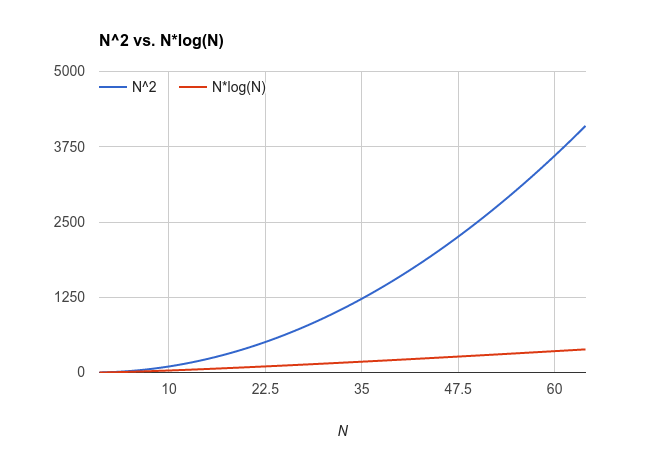
##### The big O notation for bubble sort is O(n²), while for merge sort, the big O notation is O(nlogn). This is significantly faster than bubble sort. It is also much more efficient for unordered lists.

##### The sort_students function uses the 2 merge functions above to sort students into 2 lists - males and females from highest to lowest CGPA. The function returns 2 sorted lists.
![Screenshot 2024-11-13 at 5.29.23 PM.png](<attachment:Screenshot 2024-11-13 at 5.29.23 PM.png>)
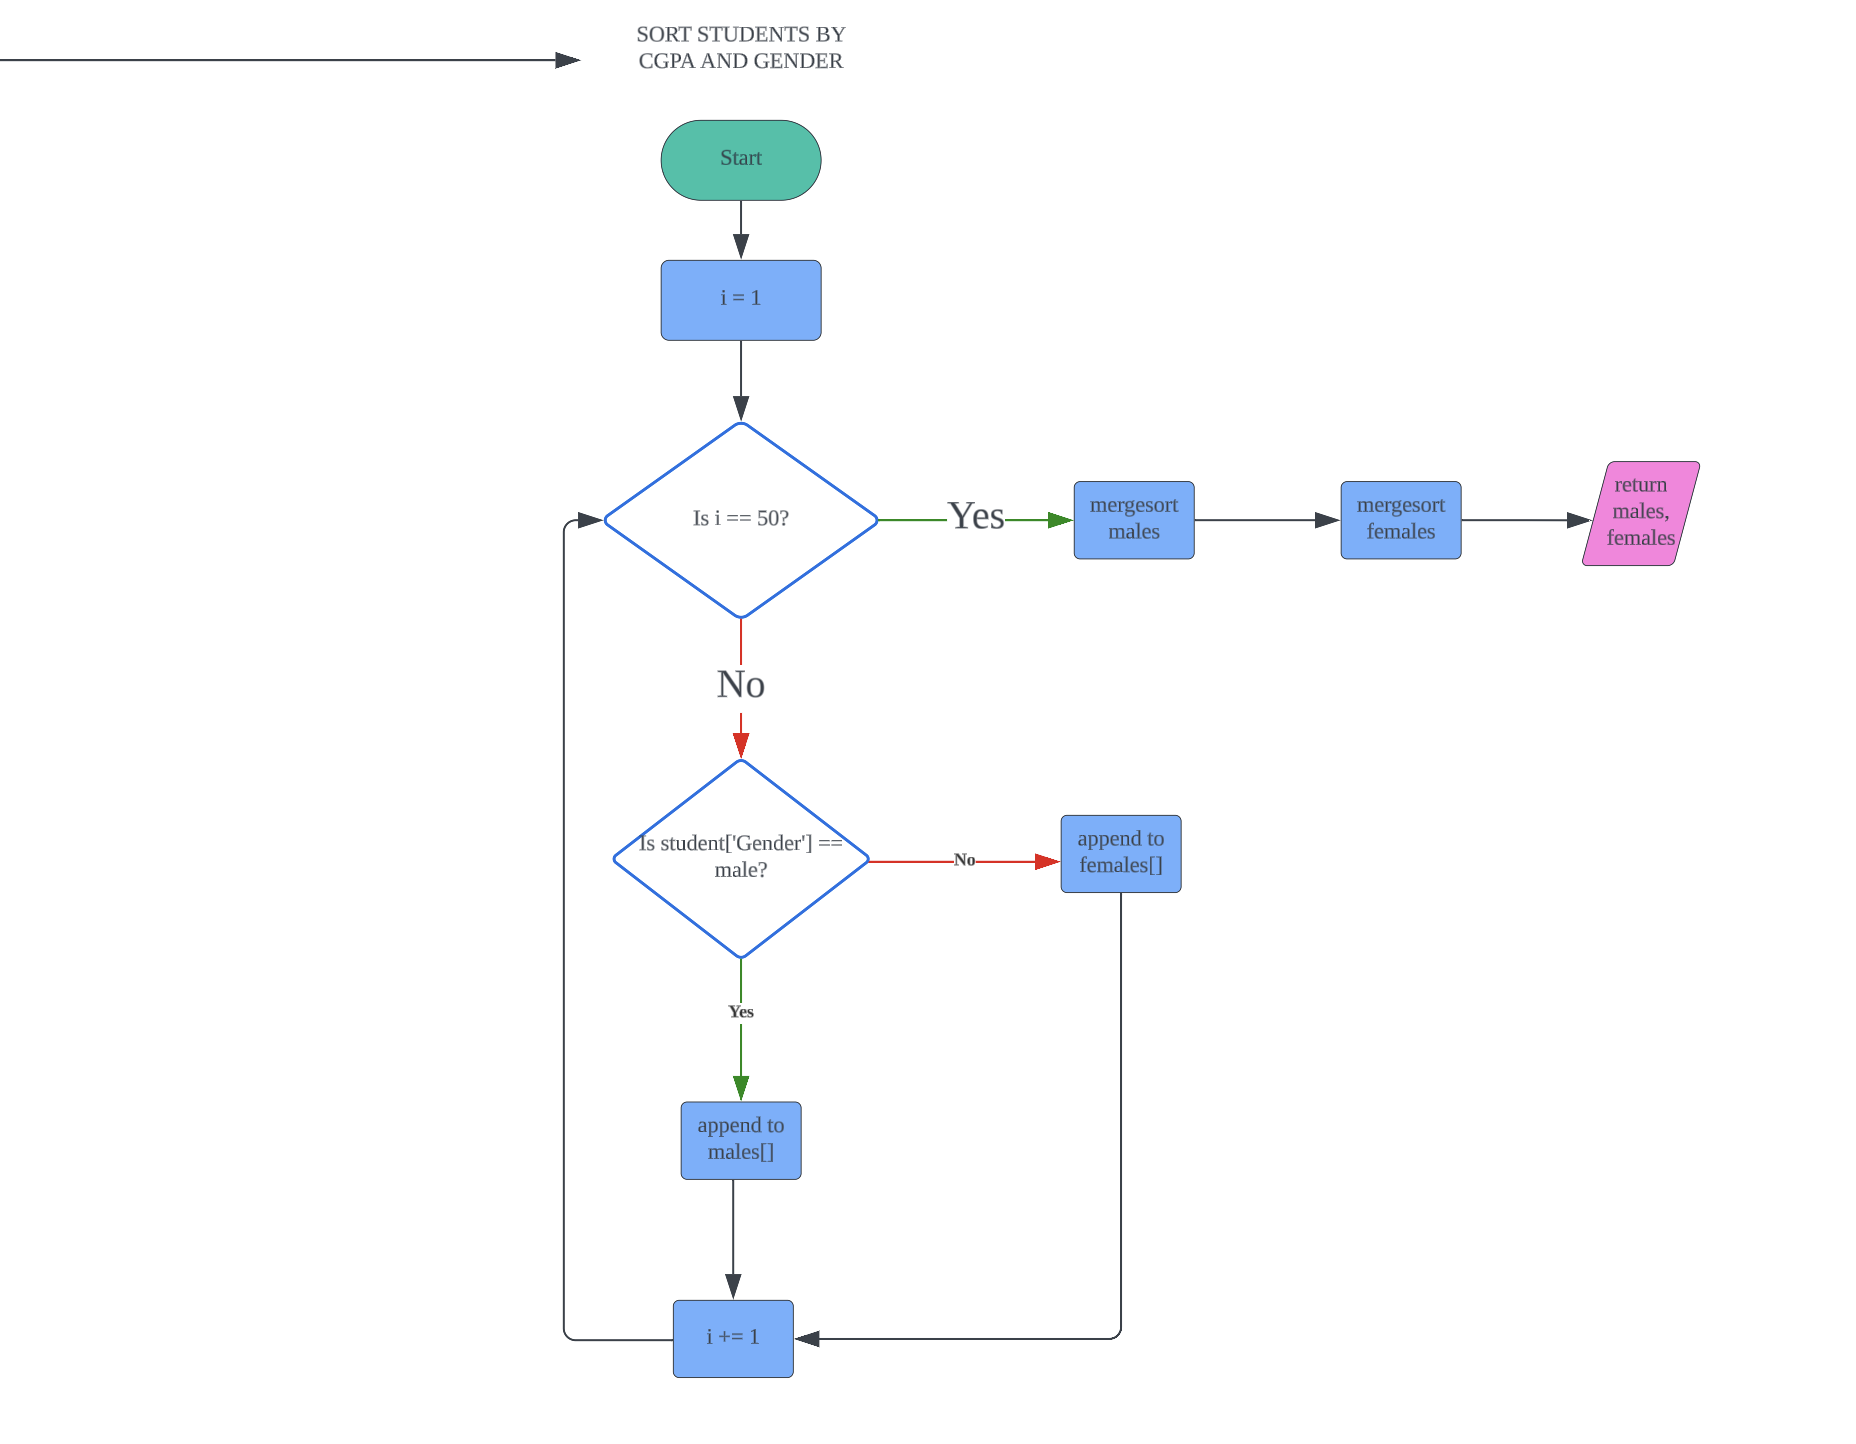

In [ ]:
def merge(left_list, right_list):
    result_list = []
    while left_list and right_list:
        if left_list[0]['CGPA'] > right_list[0]['CGPA']:
            result_list.append(left_list[0])
            left_list.pop(0)
        else:
            result_list.append(right_list[0])
            right_list.pop(0)
    result_list.extend(left_list or right_list)
    return result_list

def mergesort(list_of_items):
    list_len = len(list_of_items)
    if list_len < 2:
        return list_of_items
    mid = list_len // 2
    left_list = mergesort(list_of_items[:mid])
    right_list = mergesort(list_of_items[mid:])
    return merge(left_list, right_list)

def sort_students(students):
    males = mergesort([s for s in students if s['Gender'] == "Male"])
    females = mergesort([s for s in students if s['Gender'] == "Female"])
    return males, females

## 5. `check_school_diversity(team)`


##### This function counts the number of students from each school within a team. It creates a dictionary, `school_count`, to keep track of how many students from each school are in the team. By iterating through the students in the team, it updates the count for each school.

In [ ]:
def check_school_diversity(team):
    school_count = {}
    for member in team:
        school = member['School']
        if school not in school_count:
            school_count[school] = 0
        school_count[school] += 1
    return school_count

## 6. `assign_leftover_students(teams, leftover)`


##### The function handles students who could not initially be assigned to any team. It adds each leftover student to an existing team while ensuring no team has more than 2 students from the same school. If this is not possible, it then swaps the leftover student with an existing student from the team. If the swap is successful, the student that was swapped out is added to the leftover list for reassignment. This continues until all the leftover students are either assigned to teams or have been assigned appropriately. The `leftover []` list will then be empty.

![Screenshot 2024-11-13 at 5.11.49 PM.png](<attachment:Screenshot 2024-11-13 at 5.11.49 PM.png>)
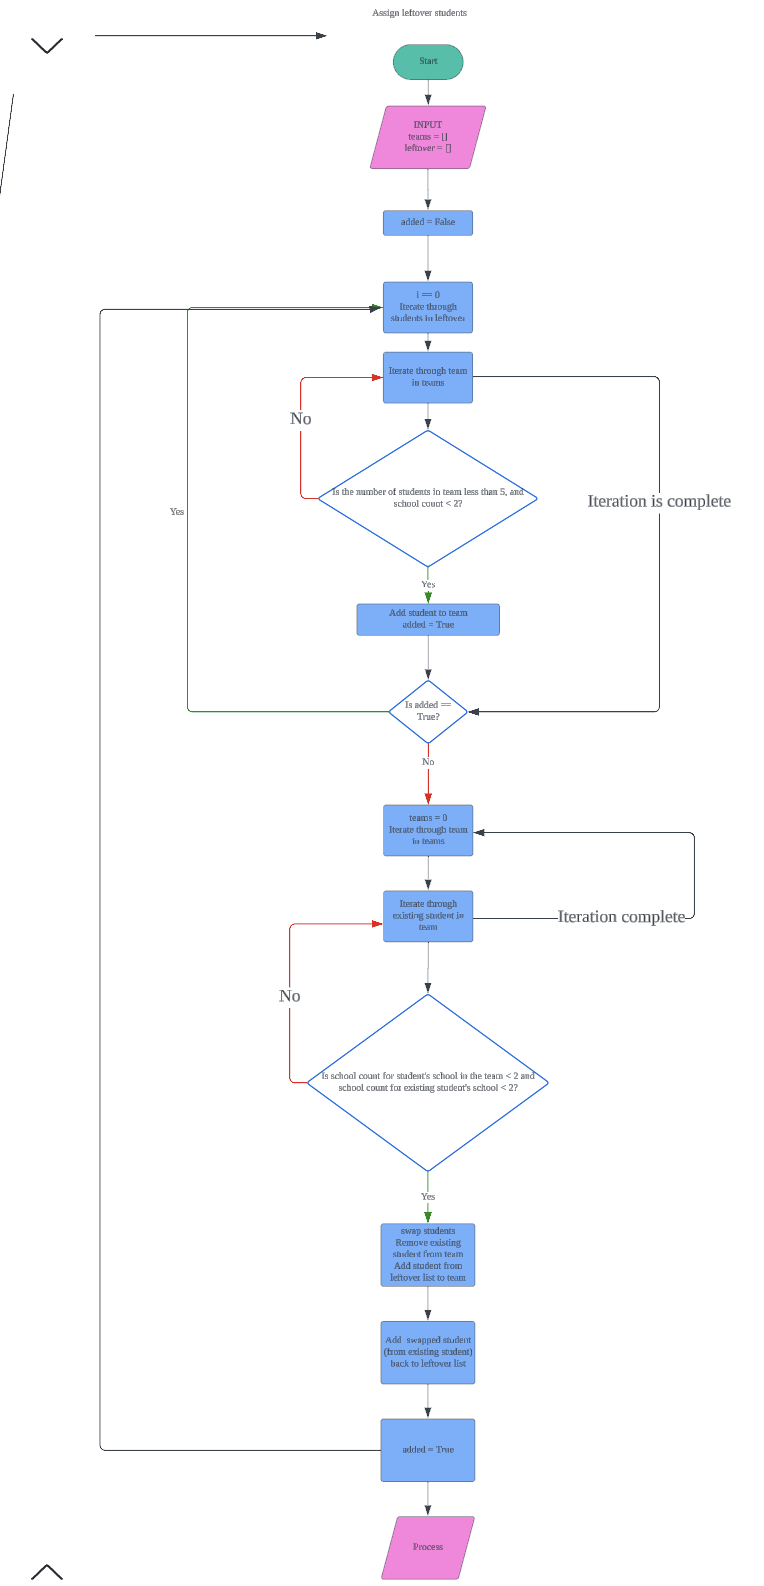

In [ ]:
def assign_leftover_students(teams, leftover):
    for student in leftover:
        added = False
        for team in teams:  # Try adding the student directly to a team respecting the school diversity
            school_count = check_school_diversity(team)
            if len(team) < 5 and school_count.get(student['School'], 0) < 2:
                team.append(student)
                added = True
                break  # Exit loop once added
        if not added: # If student couldn't be added due school too many, try to swap with a student in existing teams
            for team in teams:
                for existing_student in team:
                    school_count = check_school_diversity(team)
                    # Ensure the swap respects school diversity
                    if school_count.get(student['School'], 0) < 2 and school_count.get(existing_student['School'],
                                                                                       0) < 2:
                        team.remove(existing_student) # Perform the swap
                        team.append(student)
                        leftover.append(existing_student)  # Put the swapped student back into leftover
                        added = True
                        break  # Exit the loop once a swap is made
                if added:
                    break  # Exit outer loop once swap is made
    return teams

## 7. `balance_teams(males, females)`


The function forms 10 balanced teams of 5 students each, ensuring gender diversity and limiting the number of students from the same school to 2 per team. It handles different scenarios depending on the gender ratio.

An empty list, `teams[]`, is initliased to store all the teams formed. Another empty list, `leftover[]`, is initialised to store

The process begins with a loop that runs until 10 teams are formed. Within each iteration of the loop, a new list, `new_group` is created to hold the students for the current team and `school_list`stores the school they belong to.

Case 1: Females outnumber males, ratio > 3:2
Some teams will have 4 females and 1 male. The male with the highest CGPA is added first, and his school is tracked. A female with the lowest CGPA is added next to balance the team. To complete the team, three more females are chosen based on their median CGPAs. Each selection ensures no more than two students from the same school are added.

Case 2: Males outnumber females, ratio > 3:2
This case mirrors Case 1. The female with the highest CGPA is added first, followed by the male with the lowest CGPA. The remaining three are filled with males near the median CGPA, ensuring school diversity is respected.

Case 3: slightly more females than males, ratio = 3:2
The highest-CGPA male and the lowest-CGPA female are added first. Then, the lowest-CGPA male and the highest-CGPA female are selected. One additional female is added from the middle of the list. Throughout, the team checks for school diversity to avoid overrepresentation.

Case 4: slightly more males than females, ratio = 3:2
This case mirrors Case 3. The team alternates between selecting the highest-CGPA female and the lowest-CGPA male, ensuring that one additional male is added at the end.

After forming the 10 teams, any remaining students who couldn’t be added due to school diversity constraints are placed in the leftover list. These leftovers are passed to the assign_leftover_students function.

The function returns the final list of 10 balanced teams.

![Screenshot 2024-11-13 at 5.09.37 PM.png](<attachment:Screenshot 2024-11-13 at 5.09.37 PM.png>)
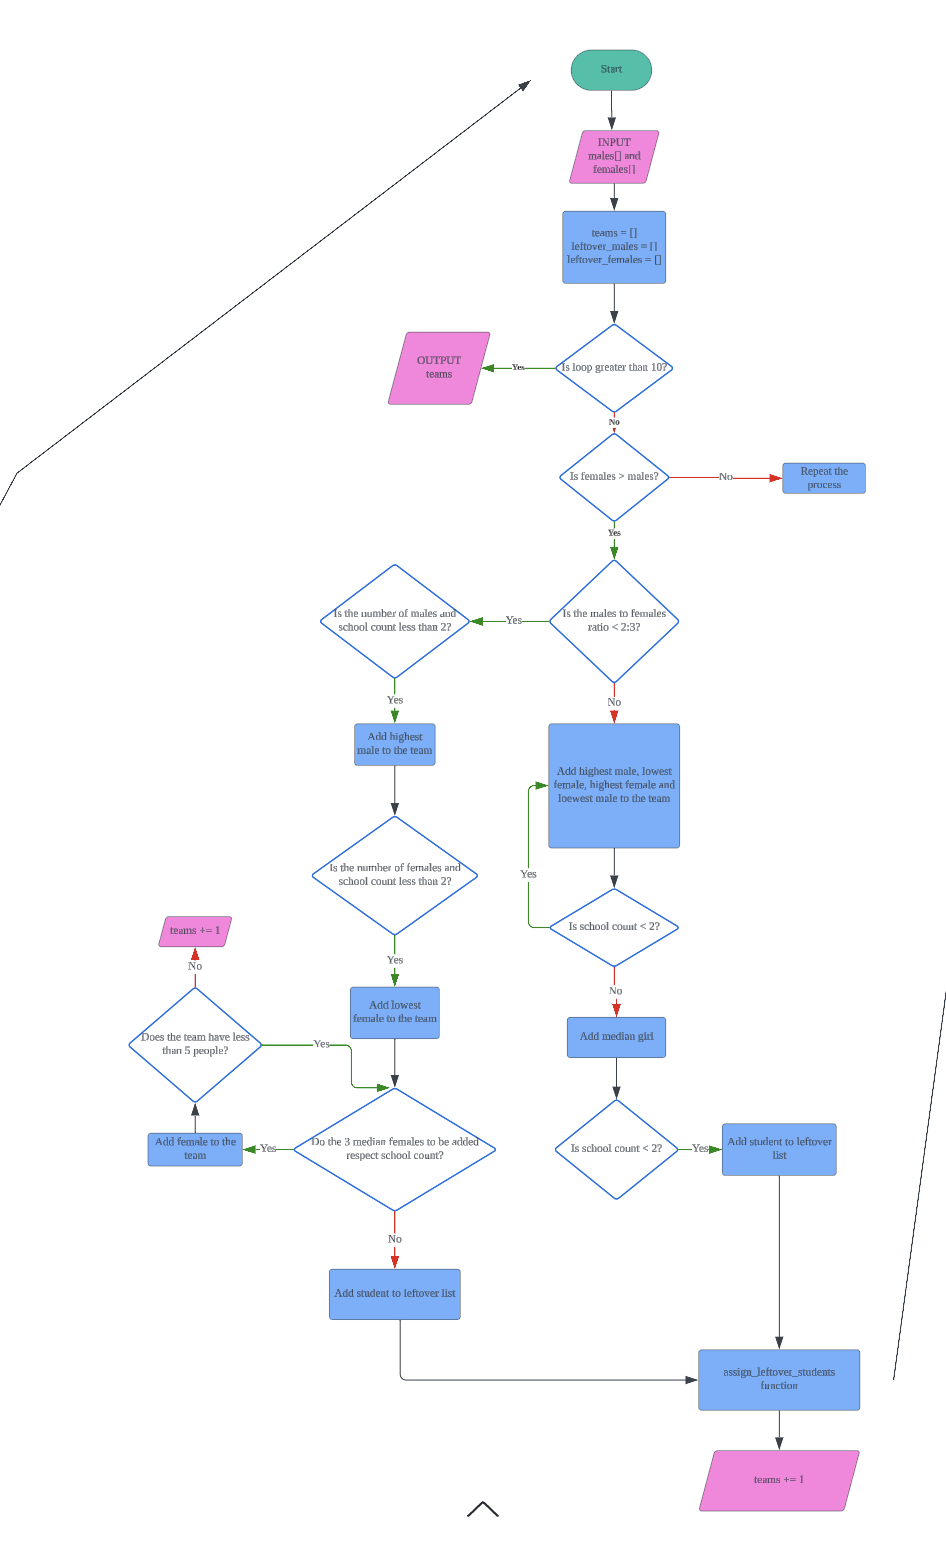

In [ ]:
def balance_teams(males, females):
    teams, leftover = [], []  # List that stores all the created teams and keep track of unassigned male and female students
    loop = 0
    while loop < 10: # to create only 10 teams
        new_group, school_list = [], []  # Holds students selected for the current team and tracks represented schools

        if len(males) / len(females) < 2 / 3: # Case 1: Females > Males, female:male > 3:2
            new_group.append(males.pop(0))
            school_list.append(new_group[-1]['School'])

            new_group.append(females.pop(-1))
            school_list.append(new_group[-1]['School'])

            median = len(females) // 2
            for i in [median, median + 1, median - 1]:
                if i < len(females) and school_list.count(females[i]['School']) < 2:
                    new_group.append(females.pop(i))
                    school_list.append(new_group[-1]['School'])
            teams.append(new_group)

        elif len(females) / len(males) < 2 / 3: # Case 2: Males > Females, male:female > 3:2
            new_group.append(females.pop(0))
            school_list.append(new_group[-1]['School'])

            new_group.append(males.pop(-1))
            school_list.append(new_group[-1]['School'])

            median = len(males) // 2
            for i in [median, median + 1, median - 1]:
                if i < len(males) and school_list.count(males[i]['School']) < 2:
                    new_group.append(males.pop(i))
                    school_list.append(new_group[-1]['School'])
            teams.append(new_group)

        elif len(males) / len(females) >= 2 / 3: # Case 3: Balanced or nearly balanced teams (females > males)
            new_group.append(males.pop(0))
            school_list.append(new_group[-1]['School'])  # adding first male to the team if possible

            new_group.append(females.pop(-1))
            school_list.append(new_group[-1]['School'])  # adds last female of condition allows

            if school_list.count(males[-1]['School']) < 2:
                new_group.append(males.pop(-1))
                school_list.append(new_group[-1]['School'])  # adds last male if possible

            if school_list.count(females[0]['School']) < 2:
                new_group.append(females.pop(0))
                school_list.append(new_group[-1]['School'])  # adds first female if possible

            if school_list.count(females[len(females) // 2]['School']) < 2:
                new_group.append(females.pop(len(females) // 2))
            teams.append(new_group)  # formed team is added to 'teams' list

        else: # Case 4: Balanced or nearly balanced teams (males > females)
            new_group.append(males.pop(0))
            school_list.append(new_group[-1]['School'])  # adds first male to the team if possible

            new_group.append(females.pop(-1))
            school_list.append(new_group[-1]['School'])  # adds last female of condition allows

            if school_list.count(males[-1]['School']) < 2:
                new_group.append(males.pop(-1))
                school_list.append(new_group[-1]['School'])  # adds last male if possible

            if school_list.count(females[0]['School']) < 2:
                new_group.append(females.pop(0))
                school_list.append(new_group[-1]['School'])  # adds last female if possible

            if school_list.count(males[len(males) // 2]['School']) < 2:
                new_group.append(males.pop(len(males) // 2))
            teams.append(new_group)  # formed team is added to 'teams' list
        loop += 1

    leftover.extend(males + females)
    teams = assign_leftover_students(teams, leftover)
    return teams


## 8. `export_teams_to_csv(team_data, csv_file_name)`


In [2]:
def export_teams_to_csv(team_data, csv_file_name):
    with open(csv_file_name, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Tutorial Group', 'Student ID', 'School', 'Name', 'Gender', 'CGPA', 'Team Assigned'])
        for tutorial, teams in team_data.items():
            team_number = 1
            for team in teams:
                for student in team:
                    writer.writerow([
                        tutorial,
                        student['Student ID'],
                        student['School'],
                        student['Name'],
                        student['Gender'],
                        student['CGPA'],
                        team_number
                    ])
                team_number += 1


 This function exports the team data to a CSV file. It writes the details of each student in the team. Using the `with open()` statement, the file is opened in read mode to ensure it is properly closed after processing. The first row of the file contains column headers to organise the data. The function iterates through the each tutorial group and numbers each team.

## Full Code

In [4]:
import csv
students = []
def read_csv(file_path):
    with open(file_path, 'r') as file:
        headers = file.readline().strip().split(',')
        for line in file:
            values = line.strip().split(',')
            student = {
                'Tutorial Group': values[0],
                'Student ID': values[1],
                'School': values[2],
                'Name': values[3],
                'Gender': values[4],
                'CGPA': float(values[5])
            }
            students.append(student)  # add student (as dictionary with each key being the name, id, etc) to students
    return students  # there will be 6000 individual dictionaries in the list of 'students'

def group_by_tutorial_group(students): # This function would create a DICTIONARY classified by tutorial groups
    tutorial_groups = {}  # this empty dictionary will eventually contain all 6000 students
    for student in students:
        tutorial = student['Tutorial Group']  # assigning 'tutorial' to student's tutorial group
        if tutorial not in tutorial_groups:
            tutorial_groups[tutorial] = []  #tutorial name would be the key, an the [] would be the value
        tutorial_groups[tutorial].append(student)  # append the student's information into corresponding tutorial group
    return tutorial_groups

def merge(left_list, right_list):
    result_list = []
    while left_list and right_list:
        if left_list[0]['CGPA'] > right_list[0]['CGPA']:
            result_list.append(left_list[0])
            left_list.pop(0)
        else:
            result_list.append(right_list[0])
            right_list.pop(0)
    result_list.extend(left_list or right_list)
    return result_list

def mergesort(list_of_items):
    list_len = len(list_of_items)
    if list_len < 2:
        return list_of_items
    mid = list_len // 2
    left_list = mergesort(list_of_items[:mid])
    right_list = mergesort(list_of_items[mid:])
    return merge(left_list, right_list)

def sort_students(students):
    males = mergesort([s for s in students if s['Gender'] == "Male"])
    females = mergesort([s for s in students if s['Gender'] == "Female"])
    return males, females

def check_school_diversity(team):
    school_count = {}
    for member in team:
        school = member['School']
        if school not in school_count:
            school_count[school] = 0
        school_count[school] += 1
    return school_count

def assign_leftover_students(teams, leftover):
    for student in leftover:
        added = False
        for team in teams:  # Try adding the student directly to a team respecting the school diversity
            school_count = check_school_diversity(team)
            if len(team) < 5 and school_count.get(student['School'], 0) < 2:
                team.append(student)
                added = True
                break  # Exit loop once added
        if not added: # If student couldn't be added due school too many, try to swap with a student in existing teams
            for team in teams:
                for existing_student in team:
                    school_count = check_school_diversity(team)
                    # Ensure the swap respects school diversity
                    if school_count.get(student['School'], 0) < 2 and school_count.get(existing_student['School'],
                                                                                       0) < 2:
                        team.remove(existing_student) # Perform the swap
                        team.append(student)
                        leftover.append(existing_student)  # Put the swapped student back into leftover
                        added = True
                        break  # Exit the loop once a swap is made
                if added:
                    break  # Exit outer loop once swap is made
    return teams

def balance_teams(males, females):
    teams, leftover = [], []  # List that stores all the created teams and keep track of unassigned male and female students
    loop = 0
    while loop < 10: # to create only 10 teams
        new_group, school_list = [], []  # Holds students selected for the current team and tracks represented schools

        if len(males) / len(females) < 2 / 3: # Case 1: Females > Males, female:male > 3:2
            new_group.append(males.pop(0))
            school_list.append(new_group[-1]['School'])

            new_group.append(females.pop(-1))
            school_list.append(new_group[-1]['School'])

            median = len(females) // 2
            for i in [median, median + 1, median - 1]:
                if i < len(females) and school_list.count(females[i]['School']) < 2:
                    new_group.append(females.pop(i))
                    school_list.append(new_group[-1]['School'])
            teams.append(new_group)

        elif len(females) / len(males) < 2 / 3: # Case 2: Males > Females, male:female > 3:2
            new_group.append(females.pop(0))
            school_list.append(new_group[-1]['School'])

            new_group.append(males.pop(-1))
            school_list.append(new_group[-1]['School'])

            median = len(males) // 2
            for i in [median, median + 1, median - 1]:
                if i < len(males) and school_list.count(males[i]['School']) < 2:
                    new_group.append(males.pop(i))
                    school_list.append(new_group[-1]['School'])
            teams.append(new_group)

        elif len(males) <= len(females) and len(males) / len(females) >= 2 / 3: # Case 3: Balanced or nearly balanced teams (females > males)
            new_group.append(males.pop(0))
            school_list.append(new_group[-1]['School'])  # adding first male to the team if possible

            new_group.append(females.pop(-1))
            school_list.append(new_group[-1]['School'])  # adds last female of condition allows

            if school_list.count(males[-1]['School']) < 2:
                new_group.append(males.pop(-1))
                school_list.append(new_group[-1]['School'])  # adds last male if possible

            if school_list.count(females[0]['School']) < 2:
                new_group.append(females.pop(0))
                school_list.append(new_group[-1]['School'])  # adds first female if possible

            if school_list.count(females[len(females) // 2]['School']) < 2:
                new_group.append(females.pop(len(females) // 2))
            teams.append(new_group)  # formed team is added to 'teams' list

        else: # Case 4: Balanced or nearly balanced teams (males > females)
            new_group.append(males.pop(0))
            school_list.append(new_group[-1]['School'])  # adds first male to the team if possible

            new_group.append(females.pop(-1))
            school_list.append(new_group[-1]['School'])  # adds last female of condition allows

            if school_list.count(males[-1]['School']) < 2:
                new_group.append(males.pop(-1))
                school_list.append(new_group[-1]['School'])  # adds last male if possible

            if school_list.count(females[0]['School']) < 2:
                new_group.append(females.pop(0))
                school_list.append(new_group[-1]['School'])  # adds last female if possible

            if school_list.count(males[len(males) // 2]['School']) < 2:
                new_group.append(males.pop(len(males) // 2))
            teams.append(new_group)  # formed team is added to 'teams' list
        loop += 1

    leftover.extend(males + females)
    teams = assign_leftover_students(teams, leftover)
    return teams

def export_teams_to_csv(team_data, csv_file_name):
    with open(csv_file_name, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Tutorial Group', 'Team', 'Name', 'Student ID', 'School', 'Gender', 'CGPA'])
        for tutorial, teams in team_data.items():
            team_number = 1
            for team in teams:
                for student in team:
                    writer.writerow([tutorial, team_number, student['Name'], student['Student ID'], student['School'],
                                     student['Gender'], student['CGPA']])
                team_number += 1
                writer.writerow([])  # Add a blank row after each teams

def main():
    file_path = 'C:/Users/AloyBoy/OneDrive/Documents/NTU Y1S1/Introduction to Computational Thinking & Programming/mini project/records.csv'
    students_data = read_csv(file_path)
    tutorial_groups = group_by_tutorial_group(students_data)
    all_team_data = {}
    for tutorial, students in tutorial_groups.items():
        males, females = sort_students(students)
        teams = balance_teams(males, females)
        all_team_data[tutorial] = teams

    csv_file_name = 'no.csv'
    export_teams_to_csv(all_team_data, csv_file_name)
    print('Exported successfully as no.csv')
if __name__ == "__main__":
    main()

Exported successfully as no.csv


# 📈 **Evaluation of Results**

We used visualisation tools to help us evaluate our results
To effectively evaluate the results, we used visualisation tools using  `matplotlib`.

## 📊**CGPA Distribution**

To see the spread of CGPA, we looked at the Average and Median CGPA, the maximum and minimum CGPA as well as the standard deviation of the CGPA.

What this indicates:
1. Average and Median CGPA:
   - Shows the general academic performance across teams.
   - Should ideally be balanced for the teams so that the teams are academically diverse.

2. Maximum and Minimum CGPA:
   - Indicates the range of CGPA.
   - A broad range so that our goal of wanting students of different academic ability to work together is fulfilled.

3. Standard Deviation:
   - Reflects CGPA variability within each team.
   - Lower standard deviation in teams means evenly spread out CGPA within teams across cohort.
   - When standard deviation is low, the teams are more fair as well.

### Variance Formula:
${variance} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2$

### Standard Deviation Formula:
${std\_dev\_gpa} = \sqrt{\text{variance}}$

### For a visual representation, we looked at the average CGPA across all the teams in a graph.
### Based on the graph, we can confidently conclude that the the student's CGPA for the different Teams in the different Tutorial Groups is **fairly distributed**.


Average GPA: 4.09
Minimum GPA: 4.00
Maximum GPA: 4.28
Median GPA: 4.09
Standard Deviation of GPA: 0.02651


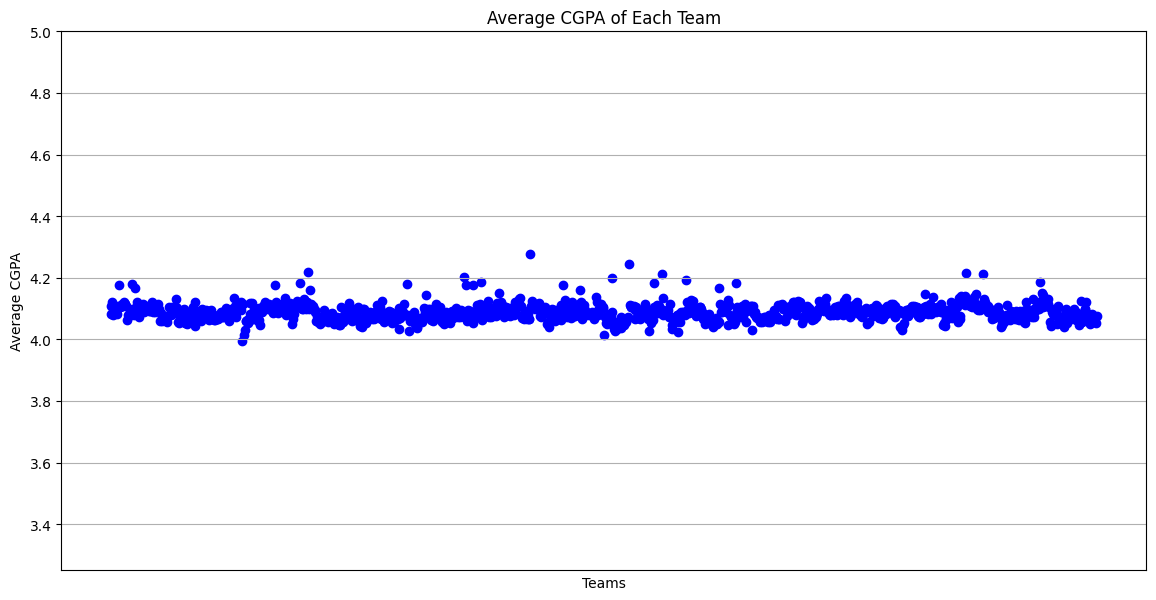

In [5]:
import csv
import matplotlib.pyplot as plt

# Function to read CSV file and analyze data
def analyze_and_plot(input_file):
    # Initialize dictionaries to hold data
    team_data = {}
    gender_data = {}  # Normal dictionary for gender counts
    gender_ratio_counts = {}  # To count the 4:1, 3:2, etc. compositions
    school_count = {}  # To count unique schools per team
    school_representation = {}  # To track maximum school representation in each team

    # Read the CSV file
    with open(input_file, mode='r') as file:
        reader = csv.DictReader(file)

        for row in reader:
            team = f"{row['Tutorial Group']} Team {row['Team']}"  # Create a unique team identifier
            cgpa = float(row['CGPA'])
            gender = row['Gender'].strip().lower()  # Normalize gender value
            school = row['School'].strip()  # Get the school name

            # Initialize the team data if it doesn't exist
            if team not in team_data:
                team_data[team] = []
                gender_data[team] = {'Male': 0, 'Female': 0}  # Initialize gender counts for the team
                school_count[team] = set()  # Use a set to track unique schools
                school_representation[team] = {}  # Initialize for school representation

            # Append CGPA to the team's data
            team_data[team].append(cgpa)

            # Count gender
            if gender == 'male':
                gender_data[team]['Male'] += 1
            elif gender == 'female':
                gender_data[team]['Female'] += 1

            # Add school to the unique school set for the team
            school_count[team].add(school)

            # Count school representation
            if school not in school_representation[team]:
                school_representation[team][school] = 0
            school_representation[team][school] += 1

    # Calculate average CGPA for each team
    average_cgpa = {team: sum(cgpas) / len(cgpas) for team, cgpas in team_data.items()}

    # Calculate statistics manually
    cgpa_values = list(average_cgpa.values())
    avg_gpa = sum(cgpa_values) / len(cgpa_values)  # Mean

    # Sort values for median calculation
    sorted_cgpa = sorted(cgpa_values)
    n = len(sorted_cgpa)
    if n % 2 == 0:
        median_gpa = (sorted_cgpa[n//2 - 1] + sorted_cgpa[n//2]) / 2
    else:
        median_gpa = sorted_cgpa[n//2]

    # Calculate standard deviation manually
    variance = sum((x - avg_gpa) ** 2 for x in cgpa_values) / len(cgpa_values)
    std_dev_gpa = variance ** 0.5

    # Print statistics
    print(f"Average GPA: {avg_gpa:.2f}")
    print(f"Minimum GPA: {min(cgpa_values):.2f}")
    print(f"Maximum GPA: {max(cgpa_values):.2f}")
    print(f"Median GPA: {median_gpa:.2f}")
    print(f"Standard Deviation of GPA: {std_dev_gpa:.5f}")

    # Prepare data for plotting Average CGPA
    teams = sorted(average_cgpa.keys())  # Sort teams in ascending order
    avg_cgpa_values = [average_cgpa[team] for team in teams]

    # Create separate figure for Average CGPA
    plt.figure(figsize=(14, 7))
    plt.scatter(range(len(teams)), avg_cgpa_values, color='blue', marker='o')
    plt.title('Average CGPA of Each Team')
    plt.xlabel('Teams')
    plt.ylabel('Average CGPA')
    plt.xticks([])  # Remove x-axis labels
    plt.ylim(3.25, 5)  # Set fixed y-axis limits
    plt.grid(True)
    plt.show()

# Call the function with your CSV file path
analyze_and_plot('no.csv')

## 👩👨 **Gender Distribution**:
### For Gender Diversity, we define a team to be diverse if it has a balanced gender ratio. Since the team size is 5, this would be fulfilled if there are at least 2 students of one gender in each team.

To look at the gender diversity for the teams, we decided to use a bar graph that shows the number of teams of each gender ratio.

###Since an overwhelming majority of teams have the gender ratio of 2:3, it can be concluded that the students are **evenly distributed** with regards to gender.
Although there are some teams with a gender ratio of 4:1 , it is evaluated to be a by-product of tutorial groups with an overwhelming majority of one population.


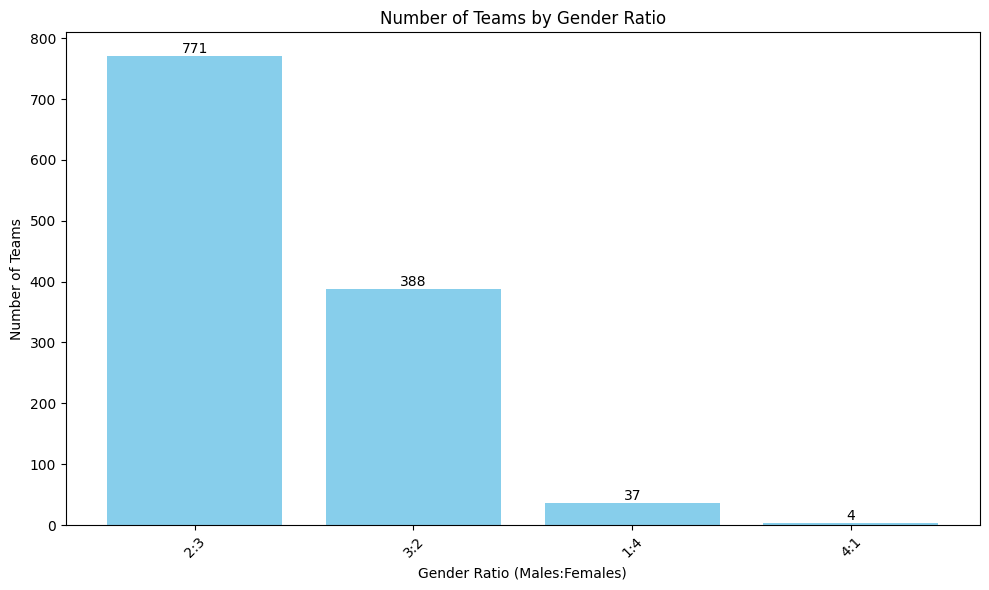

In [9]:
import csv
import matplotlib.pyplot as plt

# Function to read CSV file and analyze data
def analyze_and_plot(input_file):
    # Initialize dictionaries to hold data
    team_data = {}
    gender_data = {}  # Normal dictionary for gender counts
    gender_ratio_counts = {}  # To count the 4:1, 3:2, etc. compositions
    school_count = {}  # To count unique schools per team
    school_representation = {}  # To track maximum school representation in each team

    # Read the CSV file
    with open(input_file, mode='r') as file:
        reader = csv.DictReader(file)

        for row in reader:
            team = f"{row['Tutorial Group']} Team {row['Team']}"  # Create a unique team identifier
            cgpa = float(row['CGPA'])
            gender = row['Gender'].strip().lower()  # Normalize gender value
            school = row['School'].strip()  # Get the school name

            # Initialize the team data if it doesn't exist
            if team not in team_data:
                team_data[team] = []
                gender_data[team] = {'Male': 0, 'Female': 0}  # Initialize gender counts for the team
                school_count[team] = set()  # Use a set to track unique schools
                school_representation[team] = {}  # Initialize for school representation

            # Append CGPA to the team's data
            team_data[team].append(cgpa)

            # Count gender
            if gender == 'male':
                gender_data[team]['Male'] += 1
            elif gender == 'female':
                gender_data[team]['Female'] += 1

            # Add school to the unique school set for the team
            school_count[team].add(school)

            # Count school representation
            if school not in school_representation[team]:
                school_representation[team][school] = 0
            school_representation[team][school] += 1

            # Count gender ratios for bar graphs
    for team in gender_data.keys():
        males = gender_data[team]['Male']
        females = gender_data[team]['Female']
        total = males + females

        # Check and categorize the gender ratio
        if total > 0:  # Avoid division by zero
            male_ratio = f"{males}:{females}"
            if male_ratio in ["4:1", "3:2", "2:3", "1:4"]:
                if male_ratio not in gender_ratio_counts:  # Initialize if not present
                    gender_ratio_counts[male_ratio] = 0
                gender_ratio_counts[male_ratio] += 1

    # Prepare data for the gender ratio bar chart
    labels = list(gender_ratio_counts.keys())
    counts = list(gender_ratio_counts.values())

    # Create a bar chart for gender ratios
    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, counts, color='skyblue')
    plt.title('Number of Teams by Gender Ratio')
    plt.xlabel('Gender Ratio (Males:Females)')
    plt.ylabel('Number of Teams')
    plt.xticks(rotation=45)

    # Annotate each bar with its count
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')  # Add count above bar

    plt.tight_layout()
    plt.show()

# Call the function with your CSV file path
analyze_and_plot('no.csv')

## 🏫 **School Distribution**
To evaluate school diversity, we decided to look at the number of unique schools in a team. Our goal was to ensure that the teams had as many unique schools as possible, while taking the natural trends in the data into account.

Based on the bar graph that looks at the number of maximum representation of schools against team count, there is no team with overrepresentation of one school. The maximum representation of a certain school in a specific team is 2.

The reason for the teams with 2 students from the same school can be attributed:
1. Overrepresentation of the school in the tutorial group. Some tutorial groups had more than 10 students from the same school.
2. To allow some randomisation in the formation of teams, the criteria## is not too strict and kept at 2, which causes this phenomenon.

### Hence, it can be concluded that the teams are **diverse** when evaluating schools.

Number of teams with 1 unique school(s): 0, Percentage: 0.00%
Number of teams with 2 unique school(s): 0, Percentage: 0.00%
Number of teams with 3 unique school(s): 113, Percentage: 9.42%
Number of teams with 4 unique school(s): 582, Percentage: 48.50%
Number of teams with 5 unique school(s): 505, Percentage: 42.08%


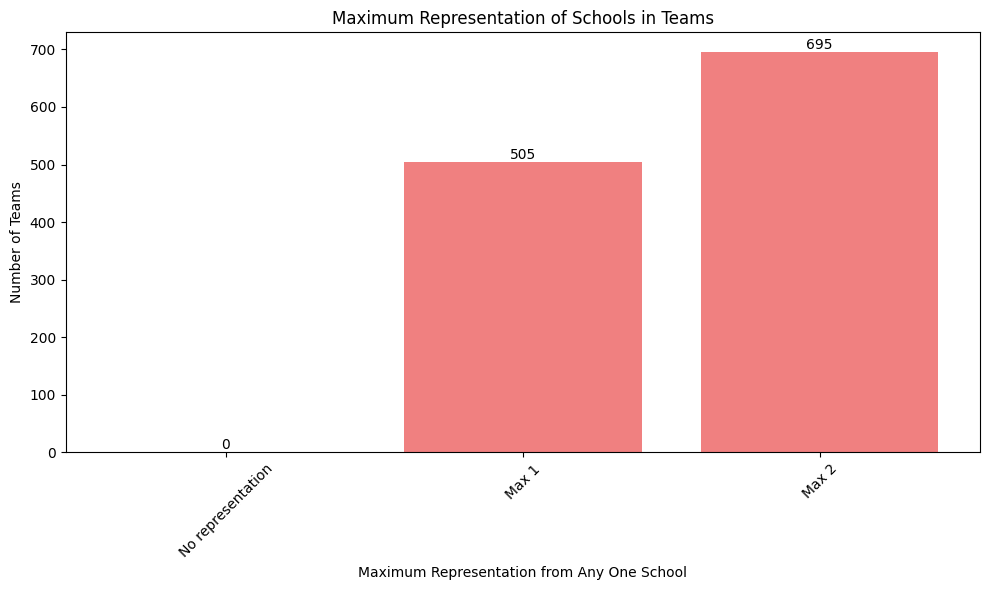

In [8]:
import csv
import matplotlib.pyplot as plt

# Function to read CSV file and analyze data
def analyze_and_plot(input_file):
    # Initialize dictionaries to hold data
    team_data = {}
    gender_data = {}  # Normal dictionary for gender counts
    gender_ratio_counts = {}  # To count the 4:1, 3:2, etc. compositions
    school_count = {}  # To count unique schools per team
    school_representation = {}  # To track maximum school representation in each team

    # Read the CSV file
    with open(input_file, mode='r') as file:
        reader = csv.DictReader(file)

        for row in reader:
            team = f"{row['Tutorial Group']} Team {row['Team']}"  # Create a unique team identifier
            cgpa = float(row['CGPA'])
            gender = row['Gender'].strip().lower()  # Normalize gender value
            school = row['School'].strip()  # Get the school name

            # Initialize the team data if it doesn't exist
            if team not in team_data:
                team_data[team] = []
                gender_data[team] = {'Male': 0, 'Female': 0}  # Initialize gender counts for the team
                school_count[team] = set()  # Use a set to track unique schools
                school_representation[team] = {}  # Initialize for school representation

            # Append CGPA to the team's data
            team_data[team].append(cgpa)

            # Count gender
            if gender == 'male':
                gender_data[team]['Male'] += 1
            elif gender == 'female':
                gender_data[team]['Female'] += 1

            # Add school to the unique school set for the team
            school_count[team].add(school)

            # Count school representation
            if school not in school_representation[team]:
                school_representation[team][school] = 0
            school_representation[team][school] += 1

    # Calculate the percentage of teams by unique school count
    unique_school_counts = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}

    for team in school_count.keys():
        unique_count = len(school_count[team])
        if unique_count in unique_school_counts:
            unique_school_counts[unique_count] += 1

    total_teams = len(school_count)
    percentages = {k: (v / total_teams) * 100 for k, v in unique_school_counts.items()}

    # Print percentages of teams by unique school counts with team counts
    for count, number in unique_school_counts.items():
        percentage = percentages[count]
        print(f"Number of teams with {count} unique school(s): {number}, Percentage: {percentage:.2f}%")

    # Prepare data for visualizing maximum representation in schools
    school_representation_count = {i: 0 for i in range(3)}  # Counts for max 0, 1, 2

    for team, schools in school_representation.items():
        max_rep = max(schools.values(), default=0)
        if max_rep >= 2:
            school_representation_count[2] += 1  # Team has max 2 students from one school
        elif max_rep == 1:
            school_representation_count[1] += 1  # Team has max 1 student from one school
        else:
            school_representation_count[0] += 1  # No representation

    # Create a bar chart for maximum representation in schools
    representation_labels = ['No representation', 'Max 1', 'Max 2']
    representation_counts = [school_representation_count[0], school_representation_count[1], school_representation_count[2]]

    plt.figure(figsize=(10, 6))
    plt.bar(representation_labels, representation_counts, color='lightcoral')
    plt.title('Maximum Representation of Schools in Teams')
    plt.xlabel('Maximum Representation from Any One School')
    plt.ylabel('Number of Teams')
    plt.xticks(rotation=45)

    # Annotate each bar with its count
    for i, count in enumerate(representation_counts):
        plt.text(i, count, str(count), ha='center', va='bottom')  # Add count above bar

    plt.tight_layout()
    plt.show()

# Call the function with your CSV file path
analyze_and_plot('no.csv')


## **Overall**

### Since the 3 criterias we focused on, which was school, gender and CGPA **meet** our conditions of diversity, the teams that were created using our algorithm are diverse, while also being random.

# **Challenges**

## 1. **Balancing:**

#### *Striking the right balance among various criteria, such as gender, school, and CGPA, along with their respective conditions* ####
  
 **Challenge:** Ensuring that the final groups were fair in terms of GPA distribution, school diversity, and gender representation was challenging. The data necessitated compromises, resulting in slight imbalances in gender or school distributions within some groups.

 **Solution:**

 We had to compromise by defining thresholds for each criteria:

(1) School: No 2 or 1 unique schools

(2) Gender ratio: as least 4:1 ratios and as many 3:2 ratios

(3) CGPA: Each team's average CGPA should be as similar as possible

## 2. **Merge Sort vs Bubble Sort:**

#### *Which sorting algorithm to choose*

**Challenge:** We primarily debated between using Bubble Sort or Merge Sort for sorting students by GPA.

**Solution:** Thanks to Merge Sort's *divide and conquer* approach, it is more effective at handling larger datasets, such as the one we were given.

## 3. **Swapping:**
#### *Swapping students was not anticipated* ####
 **Challenge:** In the problem decomposition, we did not forsee any swapping of students between teams. The swapping was necesssary because after the team has been built, there will be teams with 2 unique schools, which we do not want. Making the swapping based on CGPA would also be much of a problem so we needed a compromise: schools or CGPA.

 **Solution:** We chose schools because our threshold was not to have 2 or 1 unique schools. As for CGPA, we made sure that the CGPA for each teams during the formation process is very similar to the other teams. 



# **Additional Requirement**

In [ ]:
import csv

while True:
    try:
        stud_assigned = int(input('Enter number of student (4 to 10) to be assigned in one team: '))
        if stud_assigned < 4 or stud_assigned > 10 :
            print('must be between 4 to 10')
        else:
            break
    except:
        print('must be integer')

students = []  # create empty list to add the records.csv into

# This function would read csv file
def read_csv(file_path):
    with open(file_path, 'r') as file:
        headers = file.readline().strip().split(',')
        for line in file:
            values = line.strip().split(',')
            student = {
                'Tutorial Group': values[0],
                'Student ID': values[1],
                'School': values[2],
                'Name': values[3],
                'Gender': values[4],
                'CGPA': float(values[5])
            }
            students.append(student)  # add student (as dictionary with each key being the name, id, etc) to students
    return students  # there will be 6000 individual dictionaries in the list of 'students'


# This function would create a DICTIONARY classified by tutorial groups
def group_by_tutorial_group(students):
    tutorial_groups = {}  # this empty dictionary will eventually contain all 6000 students
    for student in students:
        tutorial = student['Tutorial Group']  # assigning 'tutorial' to student's tutorial group???
        if tutorial not in tutorial_groups:
            tutorial_groups[tutorial] = []  # if the tutorial group of student does not exist in tutorial_groups,
            # add tutorial group as key
        tutorial_groups[tutorial].append(student)  # append the student's information into corresponding tutorial group
    return tutorial_groups


def merge(left_list, right_list):
    result_list = []
    while left_list and right_list:
        if left_list[0]['CGPA'] > right_list[0]['CGPA']:
            result_list.append(left_list[0])
            left_list.pop(0)
        else:
            result_list.append(right_list[0])
            right_list.pop(0)
    result_list.extend(left_list or right_list)
    return result_list


def mergesort(list_of_items):
    list_len = len(list_of_items)
    if list_len < 2:
        return list_of_items
    mid = list_len // 2
    left_list = mergesort(list_of_items[:mid])
    right_list = mergesort(list_of_items[mid:])
    return merge(left_list, right_list)


def sort_students(students):
    males = mergesort([s for s in students if s['Gender'] == "Male"])
    females = mergesort([s for s in students if s['Gender'] == "Female"])
    return males, females


def check_school_diversity(team):
    school_count = {}
    for student in team:
        school = student['School']
        school_count[school] = school_count.get(school, 0) + 1
    return school_count


def balance_teams(males, females, stud_assigned):
    # intialise a list to store the teams
    teams = []

    # calculate number of males and females to assign per team
    a = stud_assigned // 2
    b = stud_assigned - a

    # calculate number of full teams that can be made and any leftover students
    num_full_teams = len(males + females) // stud_assigned
    remainder = len(males + females) % stud_assigned

    for _ in range(num_full_teams):
        new_team = []  # initialize a new team for each loop

        # assign male students to team while balancing GPA distribution
        for _ in range(a // 2):
            if males:
                new_team.append(males.pop(0))  # add male with lowest GPA
            else:
                new_team.append(females.pop(0))  # if no more males, fill with females
            if males:
                new_team.append(males.pop(-1))  # add male with highest GPA
            else:
                new_team.append(females.pop(-1))  # if no more males, fill with females

        # assign female students to team
        for _ in range(b // 2):
            if females:
                new_team.append(females.pop(0))  # add female with lowest GPA
            else:
                new_team.append(males.pop(0))  # if no more females, fill with males
            if females:
                new_team.append(females.pop(-1))  # add female with highest GPA
            else:
                new_team.append(males.pop(-1))  # if no more females, fill with males

        # add extra female if team size is odd
        if b % 2 != 0:
            if females:
                new_team.append(females.pop(0))
            else:
                new_team.append(males.pop(0))

        # add completed team to list
        teams.append(new_team)

    # distribute any leftover students across the teams
    remainder_students = males + females
    for i, student in enumerate(remainder_students):
        teams[i % len(teams)].append(student)  # spread leftover students evenly started from first teams

    return teams


def export_teams_to_csv(team_data, csv_file_name):
    with open(csv_file_name, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Tutorial Group', 'Student ID', 'School', 'Name', 'Gender', 'CGPA', 'Team Assigned'])
        for tutorial, teams in team_data.items():
            team_number = 1
            for team in teams:
                for student in team:
                    writer.writerow([
                        tutorial,
                        student['Student ID'],
                        student['School'],
                        student['Name'],
                        student['Gender'],
                        student['CGPA'],
                        team_number
                    ])
                team_number += 1


def swap_students_for_diversity(teams, team_size):
    swaps_made = True
    max_passes = 100  # limit to 100 passes to avoid infinite looping
    pass_count = 0

    # set school and gender limits based on team size entered
    if team_size == 4:
        school_limit, gender_limit = 2, 3
    elif team_size in [5, 6]:
        school_limit, gender_limit = 2, 4
    elif team_size in [7, 8]:
        school_limit, gender_limit = 3, 6
    else:
        school_limit, gender_limit = 4, 7

    # continue swapping students until no more swaps needed or max passes reached
    while swaps_made and pass_count < max_passes:
        swaps_made = False
        pass_count += 1

        for i, team in enumerate(teams): # dictionary comprehension to track number of males/females in a team
            school_counts = check_school_diversity(team)
            gender_counts = {'Male': sum(1 for s in team if s['Gender'] == 'Male'),
                             'Female': sum(1 for s in team if s['Gender'] == 'Female')}

            # if one school is overrepresented, attempt to balance it by swapping with another team's students
            for school, count in school_counts.items():
                if count > school_limit:
                    overrepresented_students = [s for s in team if s['School'] == school]

                    for student in overrepresented_students:
                        # attempt swap with other team's students
                        for j, other_team in enumerate(teams):
                            if i != j and check_school_diversity(other_team).get(school, 0) < school_limit:
                                for other_student in other_team:
                                    # check for gender and GPA before swapping
                                    if (student['Gender'] == other_student['Gender'] and abs(student['CGPA'] - other_student['CGPA']) <= 0.5):
                                        # make swap to balance school diversity
                                        team.remove(student)
                                        other_team.remove(other_student)
                                        team.append(other_student)
                                        other_team.append(student)
                                        swaps_made = True
                                        break
                                if swaps_made:
                                    break
                        if swaps_made:
                            break

            # if gender balance is not achieved, attempt to swap students between teams
            if abs(gender_counts['Male'] - gender_counts['Female']) > gender_limit:
                for j, other_team in enumerate(teams):
                    other_gender_counts = {'Male': sum(1 for s in other_team if s['Gender'] == 'Male'),
                                           'Female': sum(1 for s in other_team if s['Gender'] == 'Female')}
                    if abs(other_gender_counts['Male'] - other_gender_counts['Female']) <= gender_limit:
                        for student in team:
                            for other_student in other_team:
                                # Swap if students are of opposite genders and similar GPA
                                if (student['Gender'] != other_student['Gender'] and
                                        abs(student['CGPA'] - other_student['CGPA']) <= 0.5):
                                    team.remove(student)
                                    other_team.remove(other_student)
                                    team.append(other_student)
                                    other_team.append(student)
                                    swaps_made = True
                                    break
                            if swaps_made:
                                break
                    if swaps_made:
                        break

    return teams

def main():
    file_path = '/Users/javier/Downloads/records.csv'
    students_data = read_csv(file_path)
    tutorial_groups = group_by_tutorial_group(students_data)

    all_team_data = {}
    for tutorial, students in tutorial_groups.items():
        males, females = sort_students(students)
        teams = balance_teams(males, females, stud_assigned)
        teams = swap_students_for_diversity(teams, stud_assigned)  # Apply school diversity swapping
        all_team_data[tutorial] = teams

    csv_file_name = 'no.csv'
    export_teams_to_csv(all_team_data, csv_file_name)
    print('Exported successfully as grouped9.csv')


if __name__ == "__main__":
    main()

# 🎉 **Conclusion**
We start by organizing students based on CGPA in descending order, selecting individuals from the top, bottom, and median ranges. Next, we consider gender composition, aiming to balance team gender ratios in line with tutorial group demographics. We also factor in school similarity when assigning members. If any teams remain incomplete, we add students who match the school ratio criteria. If no suitable match is available, we swap students between teams to maintain balance, repeating this process until all students are successfully assigned.
